### Assignment 2 - Linear Regression with Tariff data

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

I collected some macroeconomic data. Hope you may use the data to shed some lights on the discussion of tariff. As the data is annual data at macro level, the sample size is limited. So, the results may not capture the complicated and dynamic nature of the problem. We mainly use it for practice.

1. Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

2. Read in the dataset, 'Tariff_data.csv'. Display the data. <br>
1) CPI and PPI are the price indices for consumer and production goods, respectively. Unemployment rate is in percentage. Payrolls are in thousands.<br>
2) Starting from variable 'Real GDP', the measurement unit is in billion dollars.<br>
3) Variable names with 'real' in it are adjusted using 2017 dollar value. <br>
4) Variable names with 'nominal' in it indicate they are nominal values. We will not use them in our analysis.<br>

In [5]:
df=pd.read_csv('/content/Tariff_data.csv')
df.head()

,Time,CPI,PPI,Unemployment Rate,Payrolls,Real GDP,Real Imports,Real Exports,Tax Revenue Real,Gov Expend Real,...,Tariff Revenue Real,Median HH Income Real,GDP Deflator,Tax Revenue Nominal,Gov Debt Nominal,Household Debt Nominal,Corporate Tax Nominal,Personal Tax Nominal,Tariff Revenue Nominal,Median HH Income Nominal
0,12/31/1947,22.331667,25.575000,NaN,43919.00,2184.614,52.189,88.041,324.225451,353.150709,...,3.658323,NaN,11.426,37.046,NaN,44.913,10.589,19.790,0.418,NaN
1,12/31/1948,24.045000,27.683333,3.750000,44933.75,2274.627,60.897,69.343,310.566007,343.101019,...,3.248529,NaN,12.067,37.476,NaN,53.423,11.583,19.205,0.392,NaN
2,12/31/1949,23.809167,26.308333,6.050000,43833.75,2261.928,58.744,68.701,271.052632,384.633903,...,3.030051,NaN,12.046,32.651,NaN,61.273,9.405,16.733,0.365,NaN
3,12/31/1950,24.062500,27.341667,5.208333,45282.25,2458.532,69.433,60.157,353.620336,384.747847,...,4.378844,NaN,12.195,43.124,NaN,74.845,16.958,18.912,0.534,NaN
4,12/31/1951,25.973333,30.425000,3.283333,47925.75,2656.320,72.160,73.717,428.683001,447.274119,...,4.402757,NaN,13.060,55.986,NaN,83.447,21.421,27.055,0.575,NaN


3. Get basic information about the data. How many observations? How many variables? What are their data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      79 non-null     object 
 1   CPI                       79 non-null     float64
 2   PPI                       78 non-null     float64
 3   Unemployment Rate         78 non-null     float64
 4   Payrolls                  79 non-null     float64
 5   Real GDP                  78 non-null     float64
 6   Real Imports              78 non-null     float64
 7   Real Exports              78 non-null     float64
 8   Tax Revenue Real          78 non-null     float64
 9   Gov Expend Real           78 non-null     float64
 10  Gov Debt Real             59 non-null     float64
 11  Household Debt Real       78 non-null     float64
 12  Corporate Tax Real        78 non-null     float64
 13  Personal Tax Real         78 non-null     float64
 14  Tariff Reven

In [7]:
df.columns

Index(['Time', 'CPI', 'PPI', 'Unemployment Rate', 'Payrolls', 'Real GDP',
       'Real Imports', 'Real Exports', 'Tax Revenue Real', 'Gov Expend Real',
       'Gov Debt Real', 'Household Debt Real', 'Corporate Tax Real',
       'Personal Tax Real', 'Tariff Revenue Real', 'Median HH Income Real',
       'GDP Deflator', 'Tax Revenue Nominal', 'Gov Debt Nominal',
       'Household Debt Nominal', 'Corporate Tax Nominal',
       'Personal Tax Nominal', 'Tariff Revenue Nominal',
       'Median HH Income Nominal'],
      dtype='object')

4. We need to generate a variable 'Year' using the 'Time' variable. You may ask AI how to do it. We will discuss how to handle date and time in the future.

In [8]:
df['Year']=df['Time'].str[-4:]
df.head()

,Time,CPI,PPI,Unemployment Rate,Payrolls,Real GDP,Real Imports,Real Exports,Tax Revenue Real,Gov Expend Real,...,Median HH Income Real,GDP Deflator,Tax Revenue Nominal,Gov Debt Nominal,Household Debt Nominal,Corporate Tax Nominal,Personal Tax Nominal,Tariff Revenue Nominal,Median HH Income Nominal,Year
0,12/31/1947,22.331667,25.575000,NaN,43919.00,2184.614,52.189,88.041,324.225451,353.150709,...,NaN,11.426,37.046,NaN,44.913,10.589,19.790,0.418,NaN,1947
1,12/31/1948,24.045000,27.683333,3.750000,44933.75,2274.627,60.897,69.343,310.566007,343.101019,...,NaN,12.067,37.476,NaN,53.423,11.583,19.205,0.392,NaN,1948
2,12/31/1949,23.809167,26.308333,6.050000,43833.75,2261.928,58.744,68.701,271.052632,384.633903,...,NaN,12.046,32.651,NaN,61.273,9.405,16.733,0.365,NaN,1949
3,12/31/1950,24.062500,27.341667,5.208333,45282.25,2458.532,69.433,60.157,353.620336,384.747847,...,NaN,12.195,43.124,NaN,74.845,16.958,18.912,0.534,NaN,1950
4,12/31/1951,25.973333,30.425000,3.283333,47925.75,2656.320,72.160,73.717,428.683001,447.274119,...,NaN,13.060,55.986,NaN,83.447,21.421,27.055,0.575,NaN,1951


5. Each variable is time series data of an indicator. We can explore them using graphs. First, let's draw a graph to examine the trade trend of the US. Draw a trend graph for real Imports and Exports in the same graph. The difference between the two indicates trade deficit or surplus. <br>
What information can you get from the graph? You may check the history of World Trade Organization - WTO.<br>
The first Trump administration started the trade war in 2018. Does the policy decrease the trade deficit?

<Figure size 4000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Billions of Dollars')

Text(0.5, 1.0, 'US Real Imports and Exports')

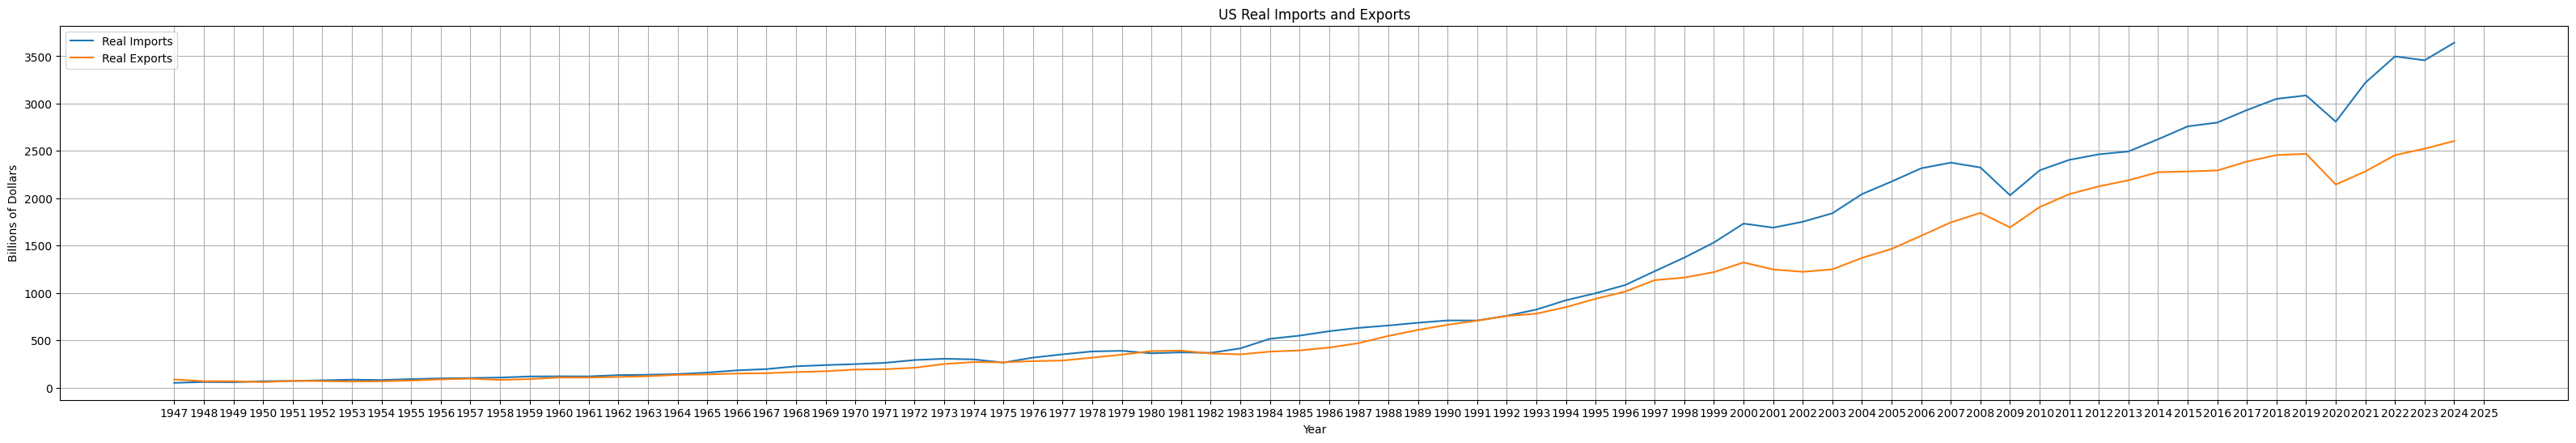

In [9]:
plt.figure(figsize=(40,6))
plt.plot(df['Year'], df['Real Imports'], label='Real Imports')
plt.plot(df['Year'], df['Real Exports'], label='Real Exports')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.title('US Real Imports and Exports')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**

1) Both real imports and real exports have generally increased significantly from 1950 to 2023. This indicates a growing US participation in global trade.

2) The US has been running a trade deficit (imports exceeding exports) since the late 1970s.

3) The trade deficit appears to have widened considerably from the late 1990s up to around 2020, suggesting imports were growing at a faster rate than exports.

**Observation on Impact of the 2018 Trade War (Trump Administration)**

Based on the graph, it's difficult to definitively conclude that the trade war significantly decreased the trade deficit. While there may have been some fluctuations, the overall trend of a substantial trade deficit appears to persist even after 2018. The deficit looks to be at its largest around 2022.

6. Next we add 'Tariff Revenue Real' to the graph. Compared with imports and exports, tariff is in much smaller scale. So, you may consider use a second Y-axis to indicate the scale of tariff. You may ask AI how to do it. What information can you infer from the graph?

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Billions of Dollars')

Text(0, 0.5, 'Billions of Dollars')

Text(0.5, 1.0, 'US Real Imports, Exports, and Tariff Revenue')

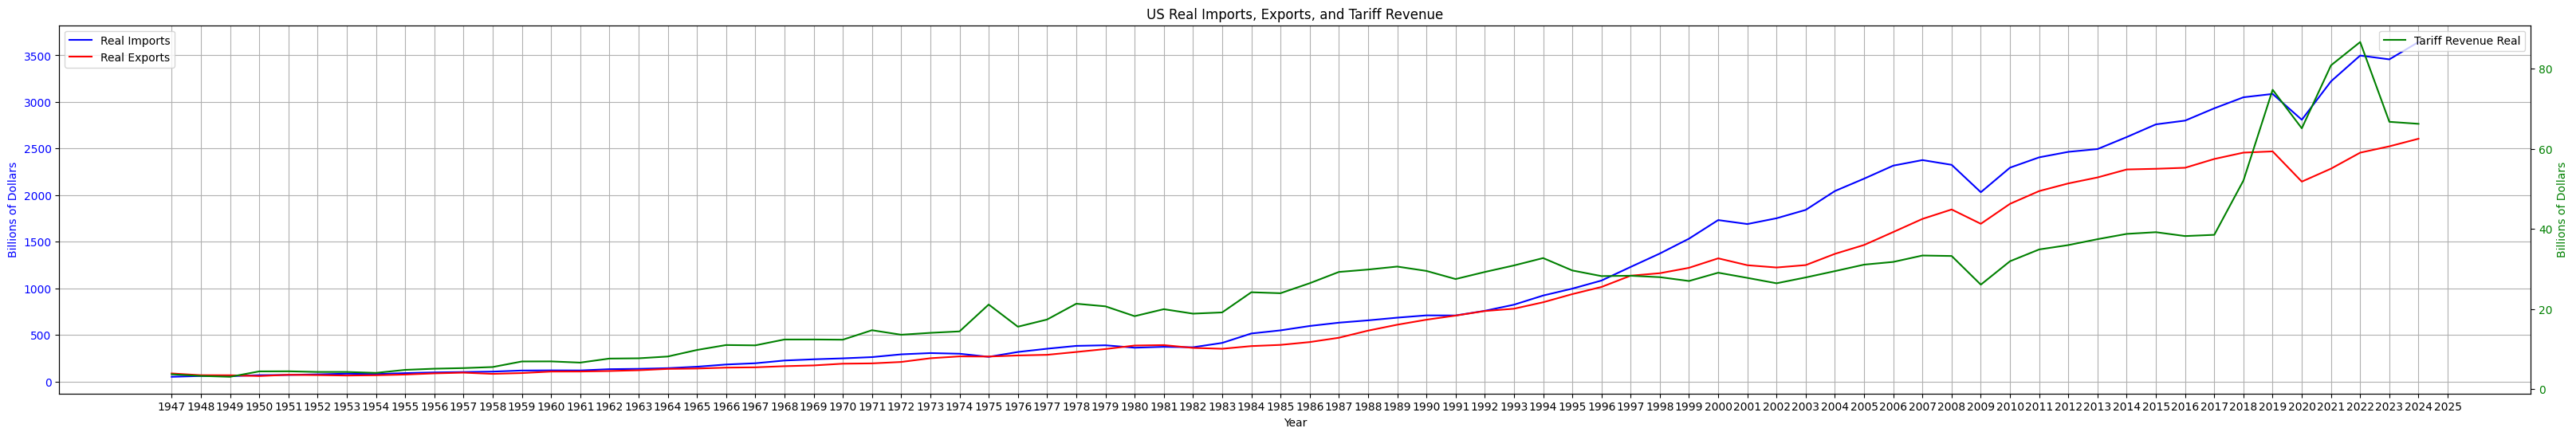

In [10]:
# Create the plot with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(40, 6))

# Plot imports and exports on the first y-axis
ax1.plot(df['Year'], df['Real Imports'], label='Real Imports', color='blue')
ax1.plot(df['Year'], df['Real Exports'], label='Real Exports', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions of Dollars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for tariff revenue
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Tariff Revenue Real'], label='Tariff Revenue Real', color='green')
ax2.set_ylabel('Billions of Dollars', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('US Real Imports, Exports, and Tariff Revenue')
plt.show()

**Observation:**

1) Tariff revenue fluctuates over time.

2) There appears to be an increase in tariff revenue around 2018-2020.

3) The tariff revenue seems to be dropping after 2022 even though the trade deficit is still large.

**Inference:**

The goal of the tariff increase was to reduce the trade deficit. However, the trade deficit remains large even after 2018, so the policy is likely to be ineffective. The tariff revenue is a relatively small component of overall trade value. Changes in tariff revenue, while potentially impactful on specific industries, may not have a large, economy-wide impact on the overall trade balance.

7. We can calculate the average effective tariff rate using tariff revenue and imports. Create a new variable 'Tariff rate', which is calculated as the division between real tariff revenue and imports and multiply 100 to get the percentage number. Then add its trend to the graph in Q5, using second Y-axis for the scale. Any findings? You may check the history of World Trade Organization - WTO.

,Time,CPI,PPI,Unemployment Rate,Payrolls,Real GDP,Real Imports,Real Exports,Tax Revenue Real,Gov Expend Real,...,GDP Deflator,Tax Revenue Nominal,Gov Debt Nominal,Household Debt Nominal,Corporate Tax Nominal,Personal Tax Nominal,Tariff Revenue Nominal,Median HH Income Nominal,Year,Tariff Rate
0,12/31/1947,22.331667,25.575000,NaN,43919.00,2184.614,52.189,88.041,324.225451,353.150709,...,11.426,37.046,NaN,44.913,10.589,19.790,0.418,NaN,1947,7.009759
1,12/31/1948,24.045000,27.683333,3.750000,44933.75,2274.627,60.897,69.343,310.566007,343.101019,...,12.067,37.476,NaN,53.423,11.583,19.205,0.392,NaN,1948,5.334465
2,12/31/1949,23.809167,26.308333,6.050000,43833.75,2261.928,58.744,68.701,271.052632,384.633903,...,12.046,32.651,NaN,61.273,9.405,16.733,0.365,NaN,1949,5.158061
3,12/31/1950,24.062500,27.341667,5.208333,45282.25,2458.532,69.433,60.157,353.620336,384.747847,...,12.195,43.124,NaN,74.845,16.958,18.912,0.534,NaN,1950,6.306574
4,12/31/1951,25.973333,30.425000,3.283333,47925.75,2656.320,72.160,73.717,428.683001,447.274119,...,13.060,55.986,NaN,83.447,21.421,27.055,0.575,NaN,1951,6.101381


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Billions of Dollars')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'US Real Imports, Exports, Tariff Revenue, and Tariff Rate')

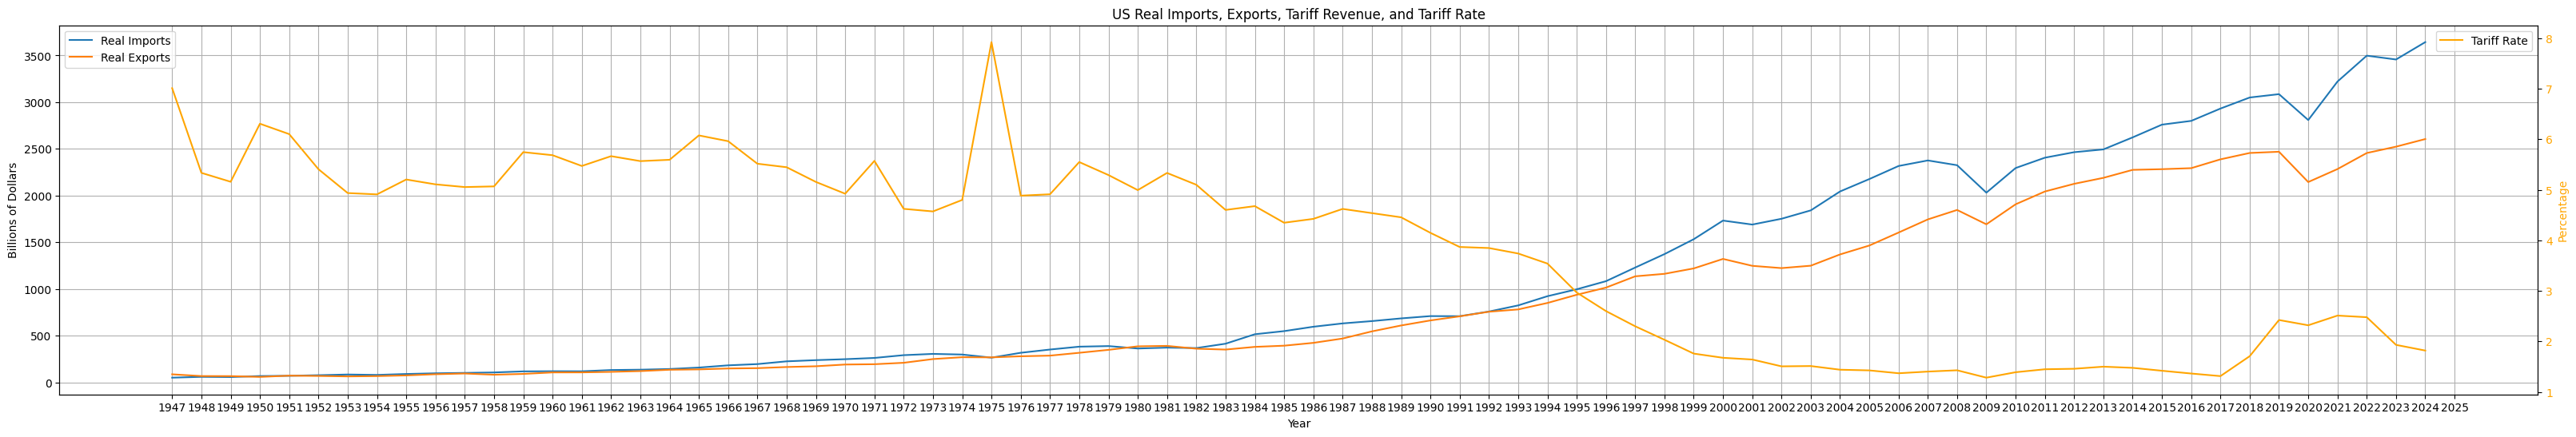

In [11]:
df['Tariff Rate']=df['Tariff Revenue Real']/df['Real Imports']*100
df.head()

fig, ax1 = plt.subplots(figsize=(40, 6))

ax1.plot(df['Year'], df['Real Imports'], label='Real Imports')
plt.plot(df['Year'], df['Real Exports'], label='Real Exports')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.legend(loc='upper left')
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Tariff Rate'], label='Tariff Rate', color='orange')
ax2.set_ylabel('Percentage', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('US Real Imports, Exports, Tariff Revenue, and Tariff Rate')
plt.show()

**Observation:**

1) The most striking feature is the clear declining trend in the average effective tariff rate from 1950 to 2023. The tariff rate was very high at the beginning, about 7%, and it sharply decreased to about 1% around 2020.

**WTO and Trariff Rates:**

The establishment of the WTO in 1995 is designed to reduce trade barriers and lower tariff rates among member countries which seems effective as evident from the decreasing effective tariff rate.

**Inference:**

The trend towards lower tariff rates suggests a move towards greater trade liberalization over time, consistent with the goals of the WTO and other international trade agreements.



8. We can take a look at prices and tariff.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Price Indices')

Text(0, 0.5, 'Billions of Dollars')

Text(0.5, 1.0, 'US CPI, PPI, and Tariff Revenue Real')

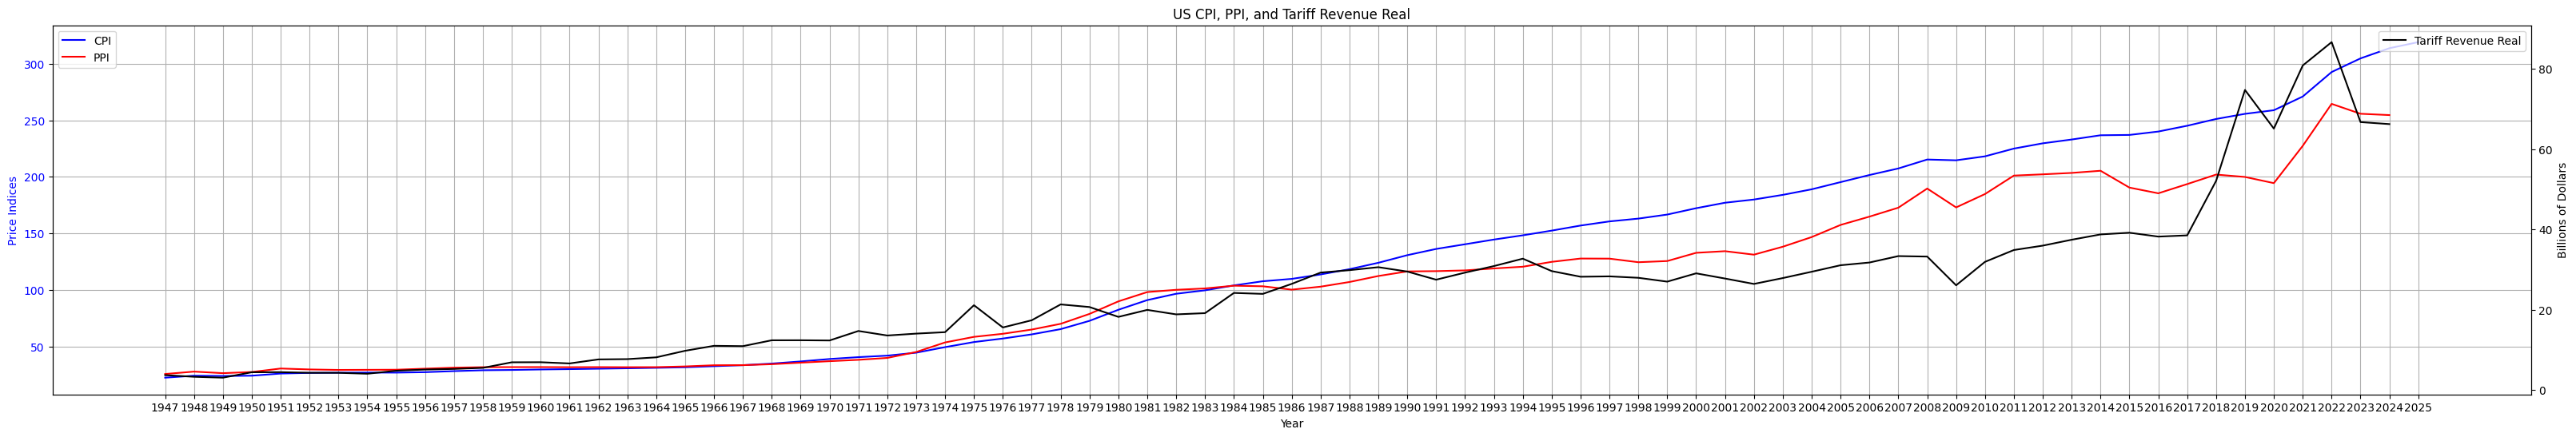

In [21]:
fig, ax1 = plt.subplots(figsize=(40, 6))

ax1.plot(df['Year'], df['CPI'], label='CPI', color='blue')
ax1.plot(df['Year'], df['PPI'], label='PPI', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price Indices', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Tariff Revenue Real'], label='Tariff Revenue Real', color='black')
ax2.set_ylabel('Billions of Dollars', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title('US CPI, PPI, and Tariff Revenue Real')
plt.show()

9. Let's check tariff and employment. 'Payrolls' represents the total number of employed people. We can compare the trend of tariff and payrolls. What information do you infer? Does the jump in tariff lead to jump in payrolls?

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Thousands of People')

Text(0, 0.5, 'Billions of Dollars')

Text(0.5, 1.0, 'US Payrolls and Tariff Revenue Real')

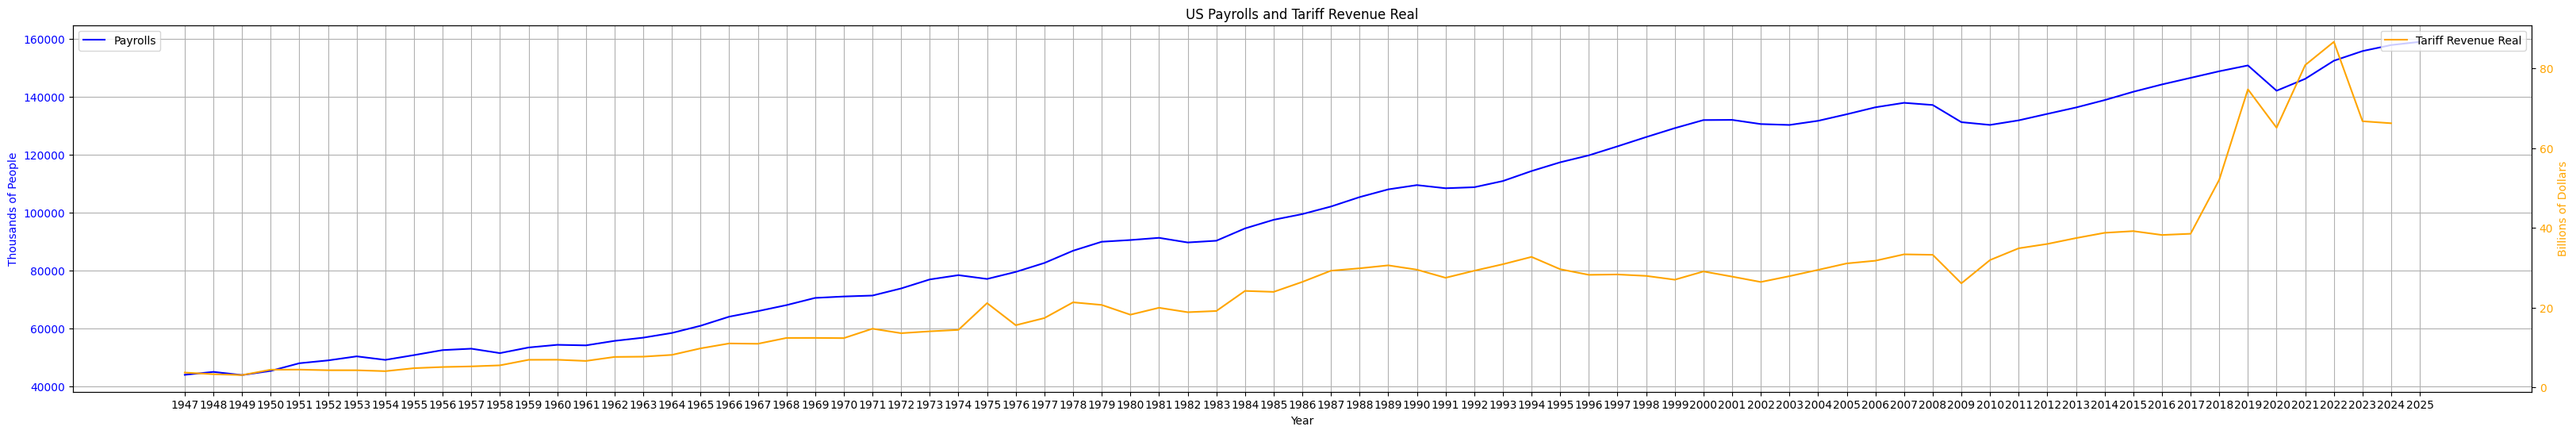

In [22]:
fig, ax1 = plt.subplots(figsize=(40, 6))

ax1.plot(df['Year'], df['Payrolls'], label='Payrolls', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Thousands of People', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Tariff Revenue Real'], label='Tariff Revenue Real', color='orange')
ax2.set_ylabel('Billions of Dollars', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('US Payrolls and Tariff Revenue Real')
plt.show()


**Observation: **

1) The number of employed people has shown a steady increase over time.

**Does a jump in tariffs lead to a jump in payrolls?**

Based on this analysis, there's no clear evidence to support the idea that increases in Tariff Revenue Real directly cause increases in payrolls (employment). In fact, the earlier data suggests the opposite -- that payrolls increased as Tariff Revenue Real decreased. However, many other factors influence employment levels.

10. Now we take a look at US government's income. We can draw a graph to compare the trend of 'Corporate Tax Real', 'Personal Tax Real', and 'Tariff Revenue Real'. What do you observe? Does tariff constitutes an important part? What is the contribution of US companies to tax revenue?

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Billions of Dollars')

Text(0, 0.5, 'Billions of Dollars')

Text(0.5, 1.0, 'US Corporate Tax, Personal Tax, and Tariff Revenue')

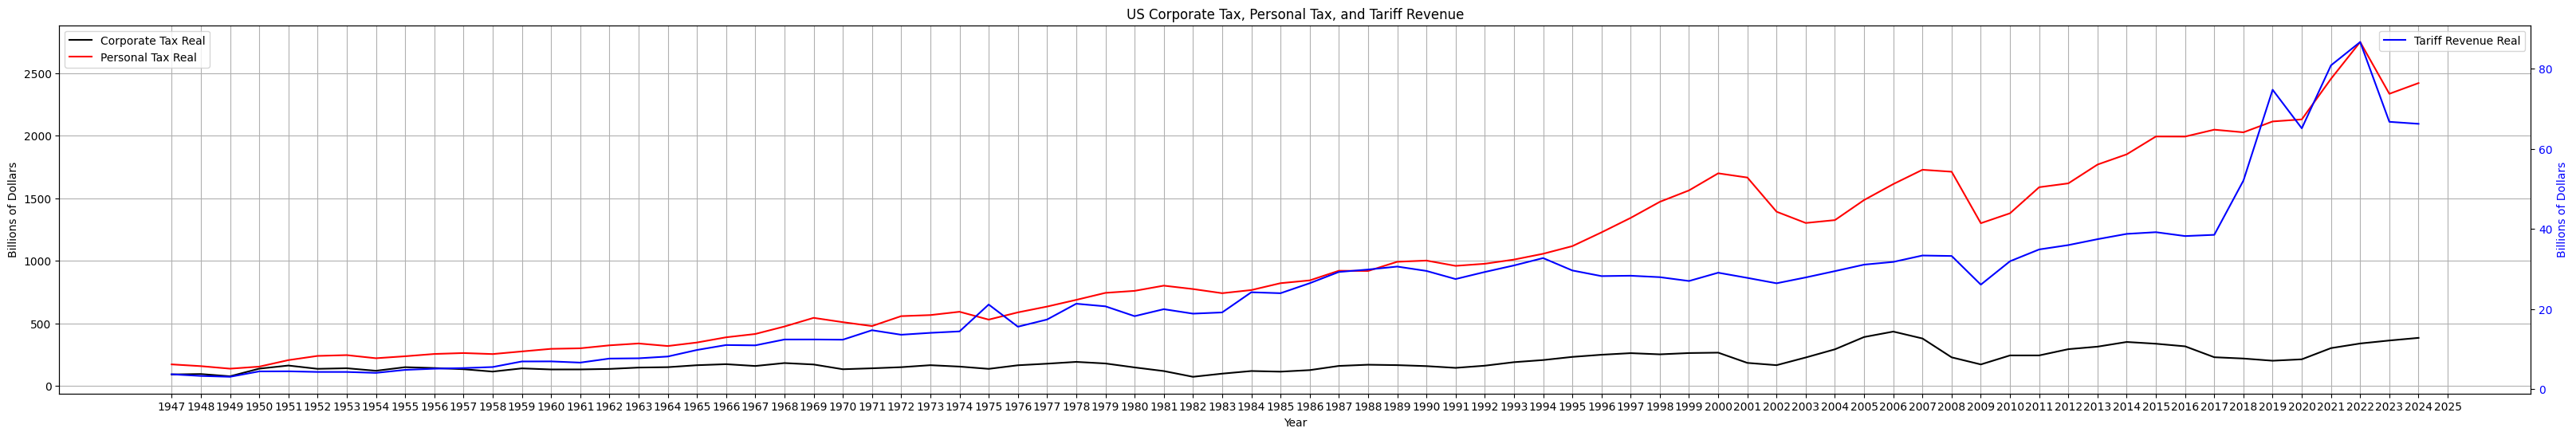

In [20]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(40, 6))

ax1.plot(df['Year'], df['Corporate Tax Real'], label='Corporate Tax Real', color = 'black')
ax1.plot(df['Year'], df['Personal Tax Real'], label='Personal Tax Real',color = 'red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions of Dollars')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Tariff Revenue Real'], label='Tariff Revenue Real',color ='blue')
ax2.set_ylabel('Billions of Dollars', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('US Corporate Tax, Personal Tax, and Tariff Revenue')
plt.show()

**Observation:**

1) Corporate Tax Revenue remained relatively stable from 1947 to the late 1990s.There was a noticeable increase occurred in the early 2000s.

2) Personal Tax Revenue steady growth is observed from 1947 onward.Some fluctuations appear in recent years but remain on an upward trajectory.

3) Tariff Revenue remains relatively stable from 1947 and the increase is relatively low compared to corporate tax and personal tax.

**Inference:**

1) Tariffs do not constitute an important part of the US government's income. Their contribution is minimal compared to corporate and personal taxes.

2) Tax revenue increasingly relied on personal and corporate taxes, especially personal tax. This suggests a shift in the tax burden towards individuals. Corporate tax revenue remained relatively stable compared to personal tax, indicating either consistent corporate taxation policies or compensatory economic growth.

11. We can explore the US debt situation. We can draw a graph for 'Real GDP', 'Gov Debt Real', and 'Household Debt Real'. In addition, let's add CPI trend using a second Y-axis. What information can you infer?

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Billions of Dollars')

Text(0, 0.5, 'CPI')

Text(0.5, 1.0, 'US Real GDP, Government Debt, Household Debt, and CPI')

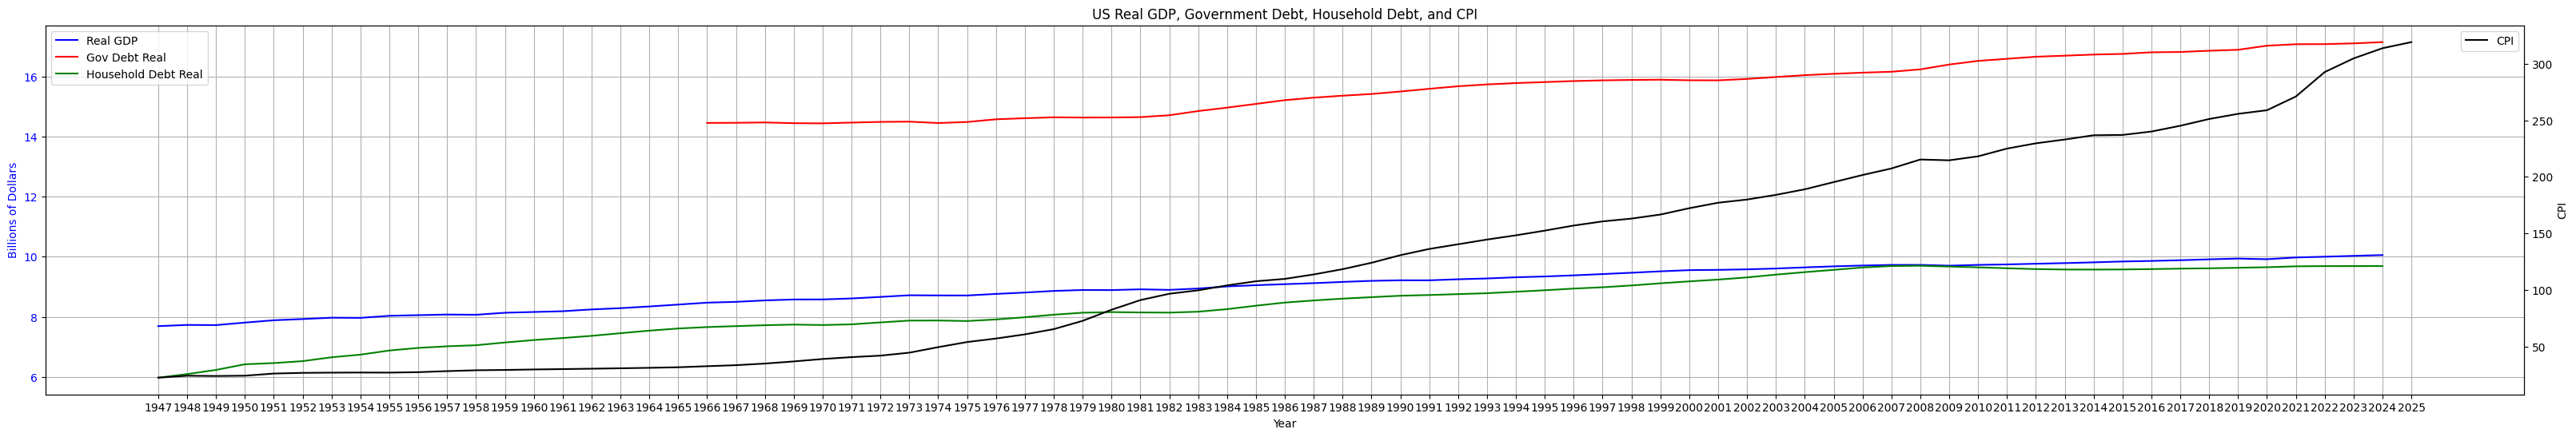

In [15]:
df['Real GDP log'] = np.log(df['Real GDP'])
df['Gov Debt Real log'] = np.log(df['Gov Debt Real'])
df['Household Debt Real log'] = np.log(df['Household Debt Real'])
#df['CPI'] = np.log1p(df['CPI'])

fig, ax1 = plt.subplots(figsize=(40, 6))

ax1.plot(df['Year'], df['Real GDP log'], label='Real GDP', color='blue')
ax1.plot(df['Year'], df['Gov Debt Real log'], label='Gov Debt Real', color='red')
ax1.plot(df['Year'], df['Household Debt Real log'], label='Household Debt Real', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions of Dollars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['CPI'], label='CPI', color='black')
ax2.set_ylabel('CPI', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title('US Real GDP, Government Debt, Household Debt, and CPI')
plt.show()

**Observation**

1) Real GDP is in upward trend. Growth appears to be relatively stable with minor fluctuations.

2) Government Debt shows a gradual increase from the 1970s, with more noticeable acceleration in recent years.The trend suggests increasing reliance on government borrowing.

3) Household Debt follows a similar upward trajectory to GDP, indicating an increase in consumer borrowing. Growth appears to slow down slightly in recent years.

4) Consumer Price Index (CPI) shows exponential growth over time.

**Inference:**

Government and household debt have grown alongside GDP, but government debt appears to have outpaced GDP in recent years, potentially indicating fiscal stress.The rapid rise in CPI, particularly in recent years, suggests inflationary pressures that could affect economic stability.The rise in household debt could indicate increased consumer spending but also raises concerns about financial stability if debt levels become unsustainable.


12. From the previous graphs, we may notice that 2008 and 2020 brought shocks to the economy. To account for such impact, we can use a dummy variable: <br>
We can identify the following years are crisis years: <br>
1973 - 1975 (ression), 1979 - 1982, 1987 (market crash), 2000-2001 (dot com bubble), 2007-2009 (financial crisis), 2020 (COVID)<br>
To code: 1 when years fall in the above years; 0 otherwise.<br>
To do that: you may define a list of these years: [1973, 1974, 1975, 1979, 1980, 1981, 1982, 1987, 2000, 2001, 2007, 2008, 2009, 2020]. Then define a function that returns 1 when year is one of these years, otherwise return 0. Apply the function to 'year' variable to generate the dummy variable 'Crisis'. You may ask AI how to implement this.

In [16]:
crisis_years = [1973, 1974, 1975, 1979, 1980, 1981, 1982, 1987, 2000, 2001, 2007, 2008, 2009, 2020]

def is_crisis_year(year):
  if int(year) in crisis_years:
    return 1
  else:
    return 0

df['Crisis'] = df['Year'].apply(is_crisis_year)
df.head()

,Time,CPI,PPI,Unemployment Rate,Payrolls,Real GDP,Real Imports,Real Exports,Tax Revenue Real,Gov Expend Real,...,Corporate Tax Nominal,Personal Tax Nominal,Tariff Revenue Nominal,Median HH Income Nominal,Year,Tariff Rate,Real GDP log,Gov Debt Real log,Household Debt Real log,Crisis
0,12/31/1947,22.331667,25.575000,NaN,43919.00,2184.614,52.189,88.041,324.225451,353.150709,...,10.589,19.790,0.418,NaN,1947,7.009759,7.689194,NaN,5.974006,0
1,12/31/1948,24.045000,27.683333,3.750000,44933.75,2274.627,60.897,69.343,310.566007,343.101019,...,11.583,19.205,0.392,NaN,1948,5.334465,7.729571,NaN,6.092937,0
2,12/31/1949,23.809167,26.308333,6.050000,43833.75,2261.928,58.744,68.701,271.052632,384.633903,...,9.405,16.733,0.365,NaN,1949,5.158061,7.723973,NaN,6.231777,0
3,12/31/1950,24.062500,27.341667,5.208333,45282.25,2458.532,69.433,60.157,353.620336,384.747847,...,16.958,18.912,0.534,NaN,1950,6.306574,7.807320,NaN,6.419563,0
4,12/31/1951,25.973333,30.425000,3.283333,47925.75,2656.320,72.160,73.717,428.683001,447.274119,...,21.421,27.055,0.575,NaN,1951,6.101381,7.884697,NaN,6.459828,0


13. Another dummy variable we need to code is the establishment of WTO. Pre and post WTO periods are significantly different for tariffs. <br>
To code: 1 for all the years after WTO establised in 1995, 0 for before.
To do that: you may define a function that returns 1 when year is after 1995, otherwise return 0. Apply the function to 'year' variable to generate the dummy variable 'WTO'. You may ask AI how to implement this.

In [17]:
def is_post_wto(year):
  if int(year) > 1995:
    return 1
  else:
    return 0

df['WTO'] = df['Year'].apply(is_post_wto)
df.head()

,Time,CPI,PPI,Unemployment Rate,Payrolls,Real GDP,Real Imports,Real Exports,Tax Revenue Real,Gov Expend Real,...,Personal Tax Nominal,Tariff Revenue Nominal,Median HH Income Nominal,Year,Tariff Rate,Real GDP log,Gov Debt Real log,Household Debt Real log,Crisis,WTO
0,12/31/1947,22.331667,25.575000,NaN,43919.00,2184.614,52.189,88.041,324.225451,353.150709,...,19.790,0.418,NaN,1947,7.009759,7.689194,NaN,5.974006,0,0
1,12/31/1948,24.045000,27.683333,3.750000,44933.75,2274.627,60.897,69.343,310.566007,343.101019,...,19.205,0.392,NaN,1948,5.334465,7.729571,NaN,6.092937,0,0
2,12/31/1949,23.809167,26.308333,6.050000,43833.75,2261.928,58.744,68.701,271.052632,384.633903,...,16.733,0.365,NaN,1949,5.158061,7.723973,NaN,6.231777,0,0
3,12/31/1950,24.062500,27.341667,5.208333,45282.25,2458.532,69.433,60.157,353.620336,384.747847,...,18.912,0.534,NaN,1950,6.306574,7.807320,NaN,6.419563,0,0
4,12/31/1951,25.973333,30.425000,3.283333,47925.75,2656.320,72.160,73.717,428.683001,447.274119,...,27.055,0.575,NaN,1951,6.101381,7.884697,NaN,6.459828,0,0


14. We prepare the dependent and independent variables.<br>
Select the following variables and save it to a dataframe.<br>
['CPI', 'Unemployment Rate','Tariff Rate', 'Real GDP', 'Gov Expend Real', 'Tariff Revenue Real', 'Tax Revenue Real', 'Crisis']<br>
Drop the missing values using dropna().<br>
Then create y and X using the selected dataframe.<br>
y: Dependent variable: 'CPI'<br>
X: Independent variables ['Unemployment Rate','Tariff Rate', 'Real GDP', 'Gov Expend Real', 'Tariff Revenue Real', 'Tax Revenue Real', 'Crisis']


In [18]:
selected_variables = ['CPI', 'Unemployment Rate','Tariff Rate', 'Real GDP', 'Gov Expend Real', 'Tariff Revenue Real', 'Tax Revenue Real', 'Crisis']
df_selected = df[selected_variables].dropna()

y = df_selected['CPI']
X = df_selected[['Unemployment Rate','Tariff Rate', 'Real GDP', 'Gov Expend Real', 'Tariff Revenue Real', 'Tax Revenue Real', 'Crisis']]

15. Prepare X with constant and run a linear regression model using statsmodels.

In [19]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     986.2
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.62e-66
Time:                        03:13:27   Log-Likelihood:                -275.31
No. Observations:                  77   AIC:                             566.6
Df Residuals:                      69   BIC:                             585.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.4350    

16. Although the model is far from accurate (the unreasonably high R-squared suggests the model is problematic), we may use it for interpretation practice. Answer the following questions:<br>
1) Which variables are important to predict CPI? Which are not?<br>
2) Interpret the impact of variable 'Unemployment Rate' and 'Tariff Revenue Real'.<br>
3) Interpret the impact of variable 'Crisis'.<br>

**1) Which variables are important to predict CPI? Which are not?**

Important Variables (Statistically Significant at 5% Level):

a) Unemployment Rate (p = 0.006) → Significant positive effect on CPI.

b) Tariff Rate (p = 0.006) → Significant negative effect on CPI.

c) Real GDP (p = 0.000) → Strong positive effect on CPI.

d) Tariff Revenue Real (p = 0.016) → Significant positive effect on CPI.


Not Important Variables (Not Statistically Significant):

a) Gov Expend Real (p = 0.599) → No significant impact on CPI.

b) Tax Revenue Real (p = 0.819) → No significant impact on CPI.

c) Crisis (p = 0.210) → Not statistically significant at the 5% level.


**2) Interpret the impact of variable 'Unemployment Rate' and 'Tariff Revenue Real'.**

a) Unemployment Rate (Coef = 2.4537, p = 0.006)

A 1% increase in unemployment rate is associated with a 2.45 unit increase in CPI, keeping other factors constant. This suggests that higher unemployment leads to inflation. The positive coefficient contradicts the traditional Phillips Curve, which suggests an inverse relationship between inflation and unemployment.

b) Tariff Revenue Real (Coef = 0.6229, p = 0.016)

A 1 unit increase in real tariff revenue leads to a 0.62 unit increase in CPI, keeping other factors constant. This suggests that higher tariff revenues contribute to inflation, likely because tariffs raise import costs, making goods more expensive.

**3) Interpret the impact of variable 'Crisis'.**

Crisis (Coef = -3.6727, p = 0.210)

The negative coefficient suggests that during a crisis, CPI tends to decrease by 3.67 units on average. However, the p-value (0.210) indicates that this effect is not statistically significant, meaning we cannot confidently conclude that crises lower inflation. A possible reason for this negative relationship could be that economic crises lead to reduced consumer demand, slowing inflationary pressures.